# **CLEAN DATA AND PERFORM EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

In [2]:
df = pd.read_csv("/content/DataCoSupplyChainDataset.csv", encoding =('ISO-8859-1'), low_memory = False)
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40

# 1. DATA VISUALIZATION


In [3]:
df.shape

(180519, 53)

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


##Outliers:

Benefit per order, Sales per customer, Customer Id, Order Customer Id, Order Item Discount, Order Item Product Price, Sales, Order Item Total, Order Profit Per Order, Product Price

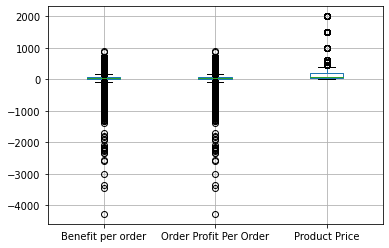

In [7]:
df.boxplot(column = ['Benefit per order', 'Order Profit Per Order', 'Product Price'])

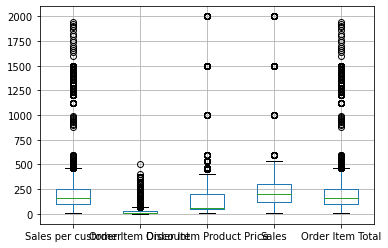

In [8]:
df.boxplot(column = [ 'Sales per customer', 'Order Item Discount', 'Order Item Product Price', 'Sales', 'Order Item Total'])

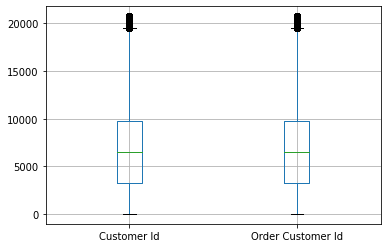

In [9]:
df.boxplot(column = ['Customer Id','Order Customer Id'])

In [10]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [11]:
df.nunique()  #Gives the no:of unique rows in each column. 

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


# 2. RELATIONSHIP ANALYSIS

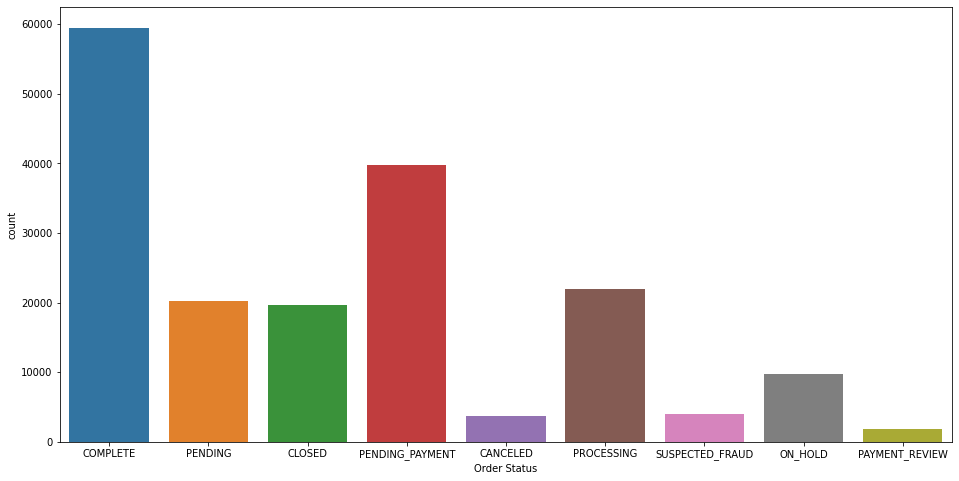

In [12]:
plt.rcParams['figure.figsize'] = 16,8
sns.countplot(x = 'Order Status', data = df)
plt.show()

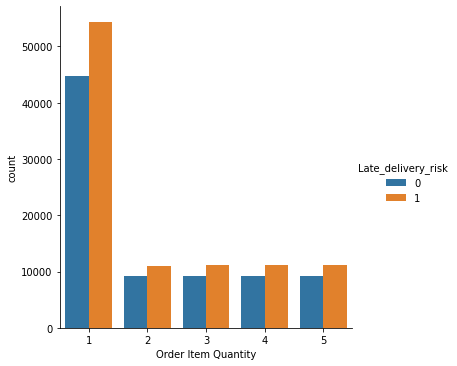

In [13]:
sns.catplot( x = 'Order Item Quantity', hue = 'Late_delivery_risk', kind = 'count',  data = df )
plt.show()

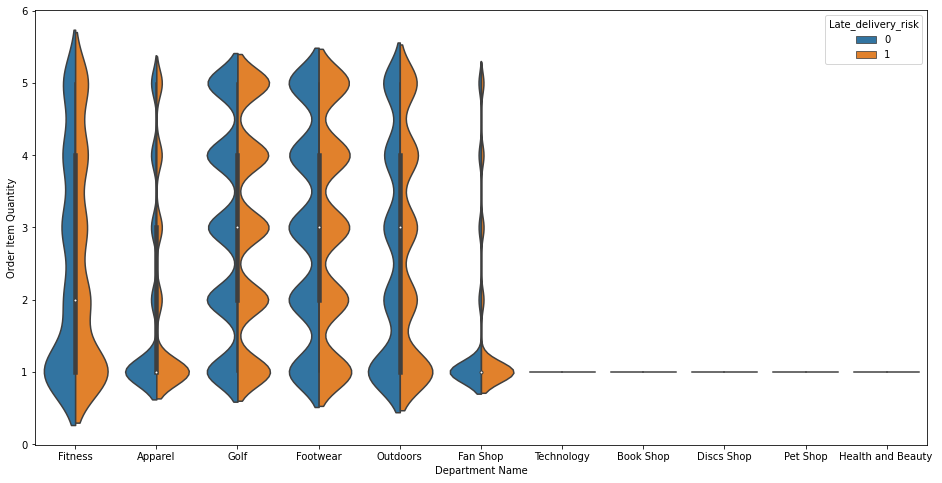

In [14]:
sns.violinplot(x = 'Department Name', y = 'Order Item Quantity', hue = 'Late_delivery_risk', data = df , split = True)

#3. CLEANING DATA

### 3.1. We have seen 'Order Zipcode' and 'Product Description' are having almost all rows with NaN. So removing these colums.

In [15]:
df=df.drop(['Order Zipcode','Product Description'],axis=1)

### 3.2. Removing 'Customer Email' and 'Customer Password' 

No information is provided.

In [16]:
df=df.drop(['Customer Email','Customer Password'],axis=1)

###3.3. Cleaning the wrong format.
'Order Date' and 'shipping date' column

In [17]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

In [18]:
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

### 3.4. Removing Duplicate columns

In [19]:
df=df.drop(['Sales per customer'],axis=1)  # 'Sales per customer' = 'Order Item Total'

In [20]:
df=df.drop(['Product Price'],axis=1)  # 'Product Price'='Order Item Product Price'

In [21]:
df=df.drop(['Benefit per order'],axis=1)  # 'Benefit per order'='Order Profit Per Order'

In [22]:
df=df.drop(['Order Customer Id'],axis=1)  # 'Customer Id'='Order Customer Id'

In [23]:
df.shape

(180519, 45)

### 3.5. Removing Unwanted rows and columns

1.Rows

If the 'Order Status' is CANCELED or CLOSED, then there is no need of the data of that row. 

In [24]:
df = df.drop(index = df[df['Order Status'] == 'CANCELED'].index)

In [25]:
df = df.drop(index = df[df['Order Status'] == 'CLOSED'].index)

2.Columns (Unwanted)

In [26]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Image', 'Product Name', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [27]:
df=df.drop(['Type','Category Id', 'Category Name','Customer Fname','Customer Id', 'Customer Lname', 'Customer Segment', 'Customer Street', 'Customer Zipcode',
            'Department Id', 'Latitude', 'Longitude', 'Order Id', 'Order Item Cardprod Id','Order Item Id', 'Order Item Profit Ratio','Order Region',
            'Product Card Id', 'Product Category Id', 'Product Image','Product Status'],axis=1)

###CORELATION MATRIX:

In [28]:
df.shape

(157211, 24)

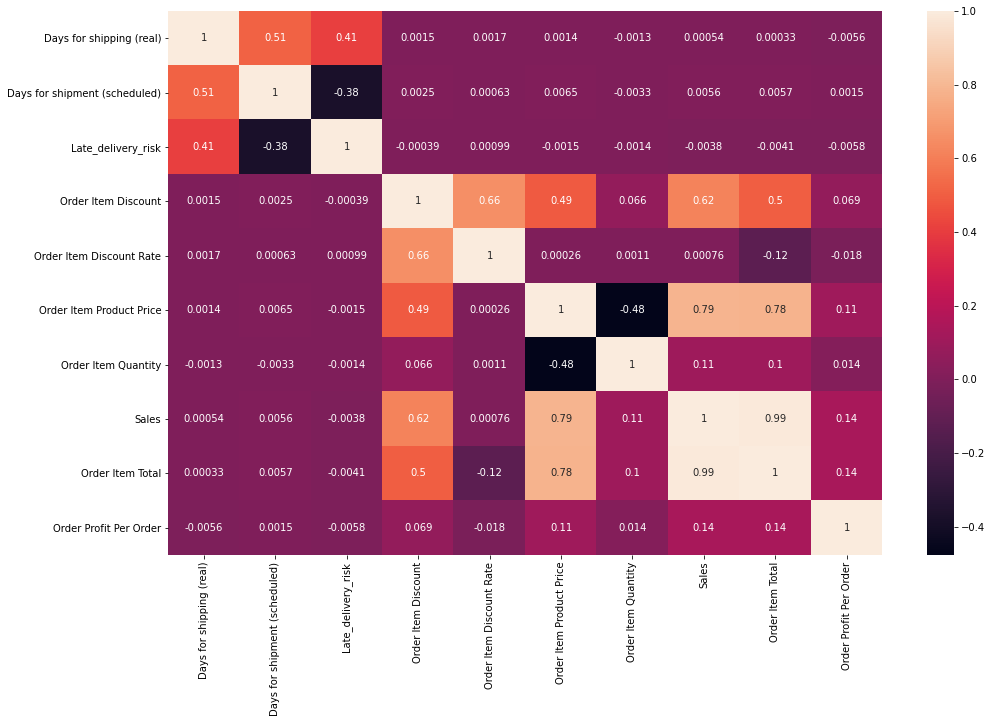

In [29]:
plt.rcParams['figure.figsize'] = 16,10
sns.heatmap(df.corr(), annot = True)

# Data Frame After Cleaning

In [30]:
df

,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Customer City,Customer Country,Customer State,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode
0,3,4,Advance shipping,0,Caguas,Puerto Rico,PR,Fitness,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,13.110000,0.04,327.750000,1,327.750000,314.640015,91.250000,Java Occidental,COMPLETE,Smart watch,2018-02-03 22:56:00,Standard Class
1,5,4,Late delivery,1,Caguas,Puerto Rico,PR,Fitness,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,16.389999,0.05,327.750000,1,327.750000,311.359985,-249.089996,Rajastán,PENDING,Smart watch,2018-01-18 12:27:00,Standard Class
3,3,4,Advance shipping,0,Los Angeles,EE. UU.,CA,Fitness,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,22.940001,0.07,327.750000,1,327.750000,304.809998,22.860001,Queensland,COMPLETE,Smart watch,2018-01-16 11:45:00,Standard Class
4,2,4,Advance shipping,0,Caguas,Puerto Rico,PR,Fitness,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,29.500000,0.09,327.750000,1,327.750000,298.250000,134.210007,Queensland,PENDING_PAYMENT,Smart watch,2018-01-15 11:24:00,Standard Class
6,2,1,Late delivery,1,Caguas,Puerto Rico,PR,Fitness,Pacific Asia,Guangzhou,China,2018-01-13 10:42:00,39.330002,0.12,327.750000,1,327.750000,288.420013,95.180000,Guangdong,COMPLETE,Smart watch,2018-01-15 10:42:00,First Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180513,3,4,Advance shipping,0,Lancaster,EE. UU.,OH,Fan Shop,Pacific Asia,Shanghái,China,2016-01-16 05:04:00,100.000000,0.25,399.980011,1,399.980011,299.989990,119.989998,Shanghái,PENDING_PAYMENT,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-19 05:04:00,Standard Class
180515,3,2,Late delivery,1,Bakersfield,EE. UU.,CA,Fan Shop,Pacific Asia,Hirakata,Japón,2016-01-16 01:34:00,4.000000,0.01,399.980011,1,399.980011,395.980011,-613.770019,Osaka,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-19 01:34:00,Second Class
180516,5,4,Late delivery,1,Bristol,EE. UU.,CT,Fan Shop,Pacific Asia,Adelaide,Australia,2016-01-15 21:00:00,8.000000,0.02,399.980011,1,399.980011,391.980011,141.110001,Australia del Sur,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-20 21:00:00,Standard Class
180517,3,4,Advance shipping,0,Caguas,Puerto Rico,PR,Fan Shop,Pacific Asia,Adelaide,Australia,2016-01-15 20:18:00,12.000000,0.03,399.980011,1,399.980011,387.980011,186.229996,Australia del Sur,PENDING_PAYMENT,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-18 20:18:00,Standard Class


#4. QUESTIONS

###1) List all the cities and the respective number of pending orders in 'India'?
###2) Which country has the most suspected fraud?
###3) Which product(s) has/have the maximum discount?
###4) Which year had the minimum sales for "Nike" products?
###5) How many successfully processed orders have days for shipping real (Real) > Days for shipment (Scheduled)?


###1) List all the cities and the respective number of pending orders in 'India'?

In [42]:
df1 = df[df['Order Country'] == 'India']
cities = {}
for i in set(df1['Order City']):
  arr1 = df1[df1['Order City'] == i]
  arr1 = arr1[arr1['Order Status'] == "PENDING"]
  cities[i] = len(arr1)

print('Cities with their respective no:of pending orders in India:\n',cities)

Cities with their respective no:of pending orders in India:
 {'Kulti': 8, 'Mau': 0, 'Hubli': 1, 'Durgapur': 11, 'Barddhaman': 0, 'Amravati': 3, 'Mumbai': 18, 'Mirzapur': 0, 'Dhule': 0, 'Gulbarga': 1, 'Kollam': 3, 'Mangalore': 2, 'Moradabad': 5, 'Tiruppur': 1, 'Panipat': 0, 'Faridabad': 10, 'Jabalpur': 11, 'Hapur': 0, 'Patiala': 1, 'Jamnagar': 1, 'Pimpri': 1, 'Aligarh': 4, 'Bhiwandi': 3, 'Indore': 0, 'Patna': 7, 'Bilaspur': 1, 'Gwalior': 0, 'Bhatinda': 0, 'Naihati': 0, 'Avadi': 0, 'Udaipur': 0, 'Jhansi': 4, 'Meerut': 2, 'Anantapur': 3, 'Sonipat': 0, 'Panihati': 0, 'Thiruvananthapuram': 3, 'Kozhikode': 0, 'Gaya': 0, 'Kochi': 0, 'Ranchi': 5, 'Imphal': 5, 'Dehra Dun': 0, 'Allahabad': 0, 'Bangalore': 24, 'Tirupati': 0, 'Puducherry': 3, 'Rohtak': 5, 'Barasat': 0, 'Raipur': 8, 'Bhubaneswar': 6, 'Bareilly': 0, 'Malegaon': 4, 'Korba': 14, 'Tiruchchirappalli': 0, 'Thanjavur': 0, 'Surat': 7, 'Satna': 5, 'Ajmer': 17, 'Kolhapur': 3, 'Thane': 1, 'Guwahati': 8, 'Jaipur': 9, 'Ludhiana': 2, 'Jodhpur': 

####* **Verification**

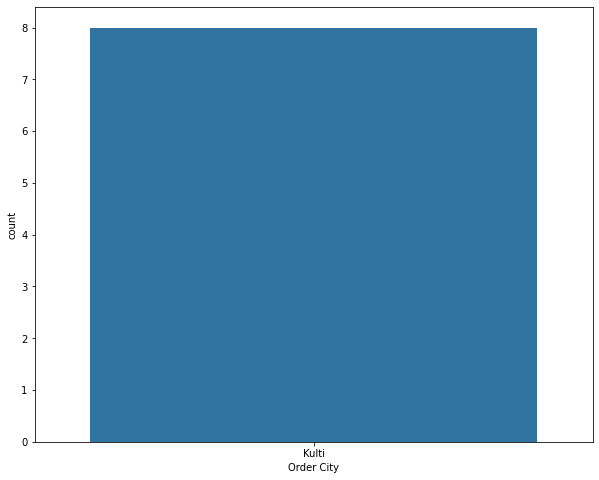

In [39]:
plt.rcParams['figure.figsize'] = 10,8
df5 =df[df['Order City'] == 'Kulti']    # Just for example, any city can be taken.
sns.countplot(x = 'Order City', data = df5[df5['Order Status'] == 'PENDING'])
plt.show()

### 2) Which country has the most suspected fraud?

In [44]:
country = []
max = 0

for i in set(df['Order Country']):
  arr2 = df[df['Order Country'] == i]
  arr2 = arr2[arr2['Order Status'] == "SUSPECTED_FRAUD"]
  temp = len(arr2)
  if temp > max:
    max = temp
    country.clear()
    country.append(i)
  elif temp == max:
    country.append(i)
print('Most suspected frauds are in:\n',country,'country')

Most suspected frauds are in:
 ['Estados Unidos'] country


#### * **Verification**

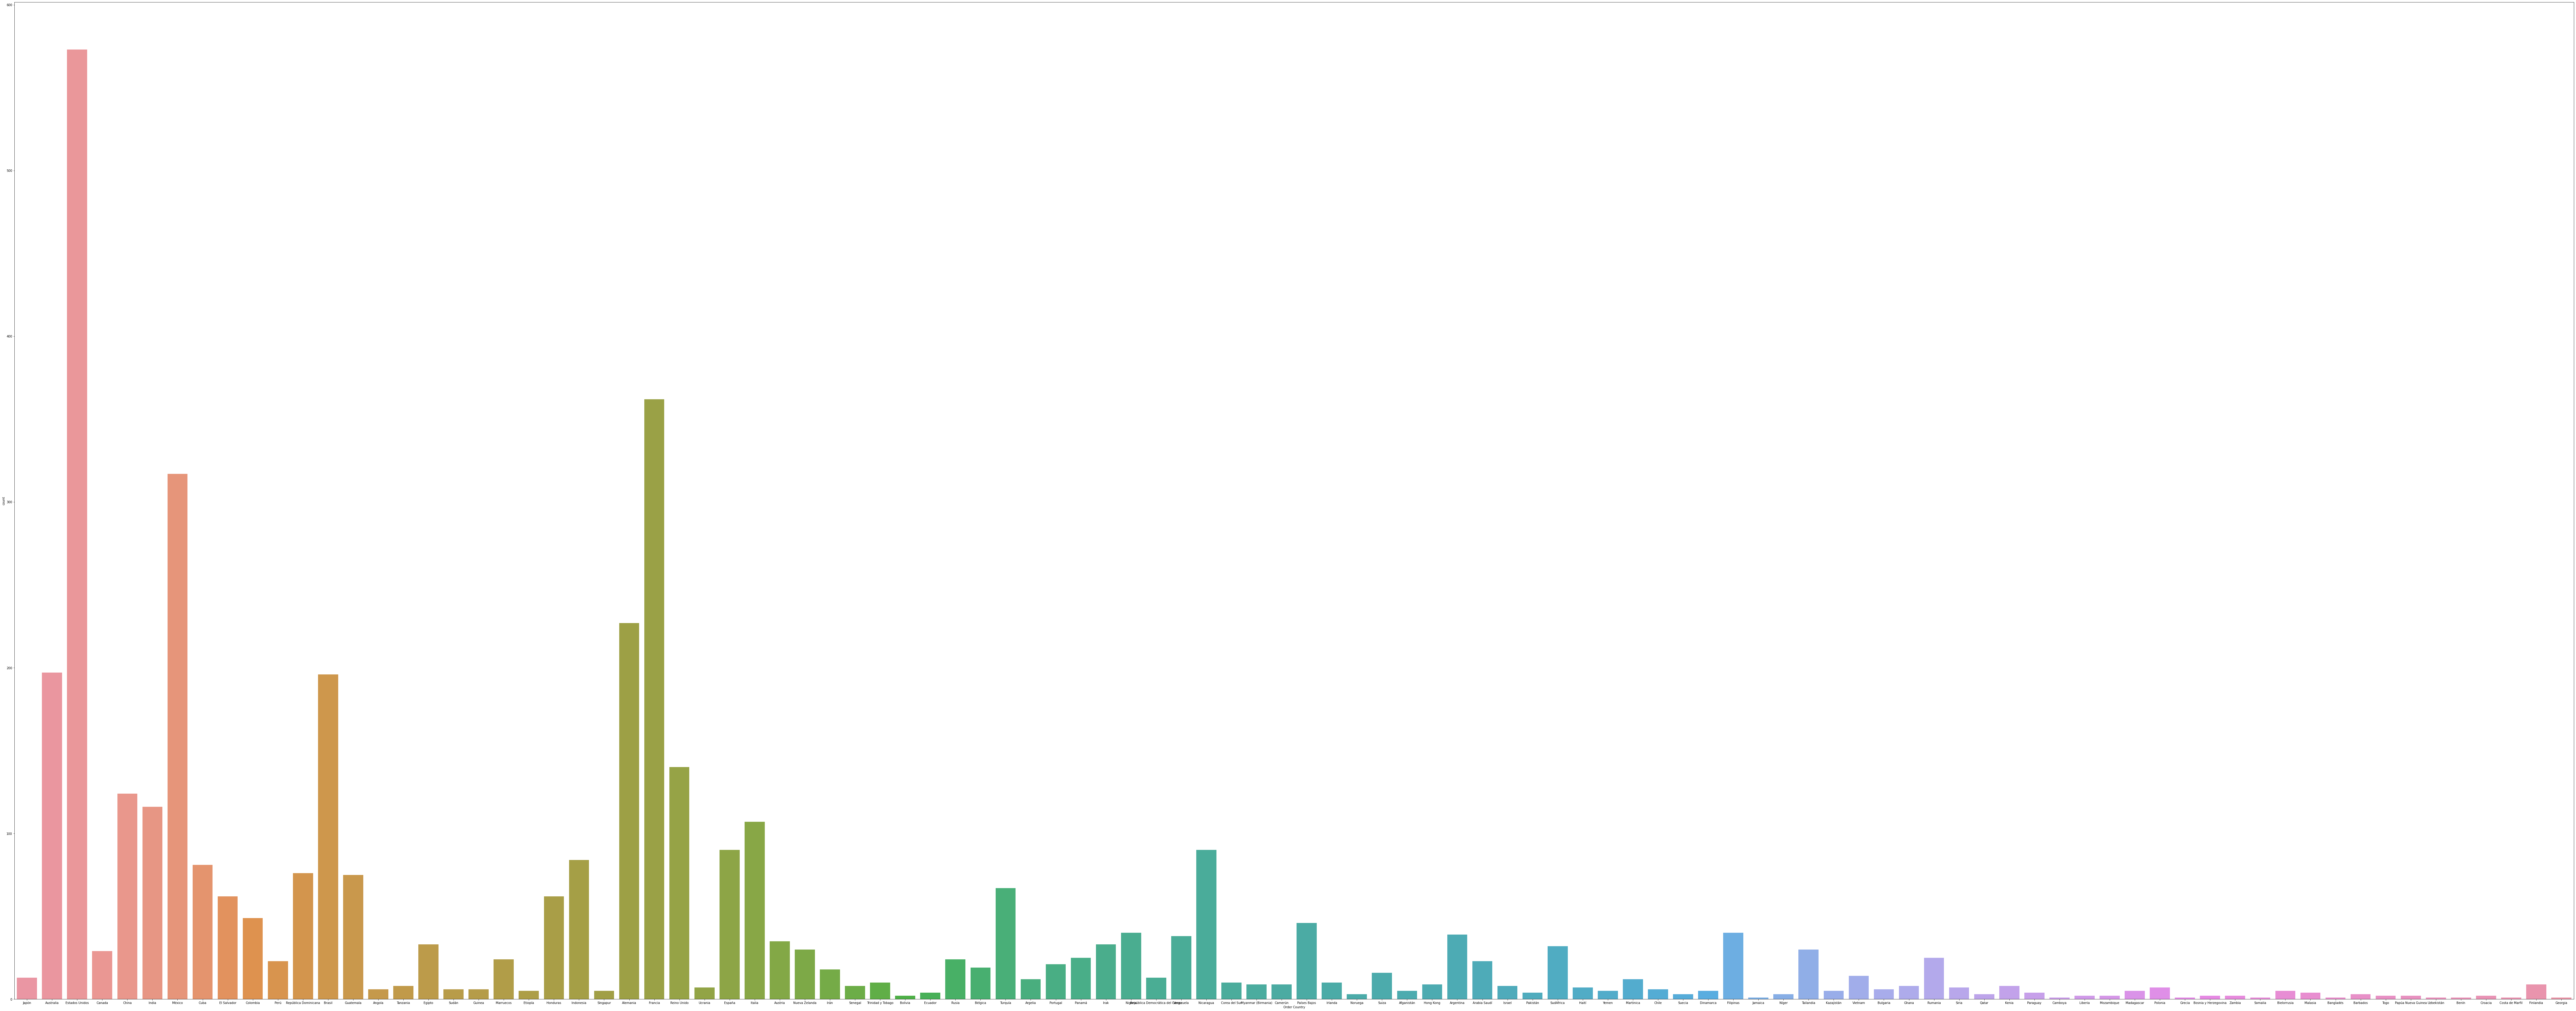

In [36]:
plt.rcParams['figure.figsize'] = 150,60
df6 =df[df['Order Status'] == "SUSPECTED_FRAUD"]
sns.countplot(x = 'Order Country', data = df6)
plt.show()                                               # 3rd Bar represents the highest suspected fraud

### 3) Which product(s) has/have the maximum discount?

In [37]:
max_dis = df['Order Item Discount'].max()
arr3 = df[df['Order Item Discount'] == max_dis]
print("Maximum discount has for:",list(arr3['Product Name']))


Maximum discount has for: ['SOLE E35 Elliptical']


### 5) How many successfully processed orders have days for shipping real (Real) > Days for shipment (Scheduled)?

In [46]:
arr5 = df[df['Order Status'] == 'COMPLETE']
a = []
for j in arr5['Days for shipment (scheduled)']:
  a.append(j)

i = 0
count = 0
for k in arr5['Days for shipping (real)']:
  if k > a[i]:
    count = count + 1
  i = i + 1

print('No:of orders for required condition is: ',count)

No:of orders for required condition is:  34199
